In [4]:
import csv

with open('baseSeparada.csv', 'r', encoding='utf-8') as entrada:
    with open('baseAtacante.csv', 'w', encoding='utf-8', newline='') as saida_b:
        leitor = csv.reader(entrada)
        escritor1 = csv.writer(saida_b)
        escritor1.writerow(['ID','Ano','Mes','Frase Original',
                           'Países_Atacantes','Estatais Atacantes','Não Estatais atacantes',
                           'Países_Atacados','Estatais atacadas','Não estatais atacadas',
                           'Ferramenta','Meios','Efeito','Ações Cibernéticas'])
        i = 1
        next(leitor)
        for linhas in leitor:
            if len(linhas[10]) == 2:
                continue  # Ignora a linha e passa para a próxima
            else:
                if 'United States' in linhas[10]:
                    id2 = i
                    ano = linhas[2]
                    mes = linhas[3]
                    descricao = linhas[4]
                    paises_atacantes = linhas[10]
                    estatais_atacantes = linhas[11]
                    naoEstatais_atacantes = linhas[12]
                    paises_atacados = linhas[15]
                    estatais_atacadas = linhas[16]
                    naoEstatais_atacados = linhas[17]
                    ferramenta = linhas[18]
                    meios = linhas[19]
                    efeito = linhas[20]
                    acoesCiber = linhas[21]
                    insercao = [id2, ano, mes, descricao, paises_atacantes, estatais_atacantes, naoEstatais_atacantes,
                                paises_atacados, estatais_atacadas, naoEstatais_atacados,
                                ferramenta, meios, efeito,acoesCiber]
                    escritor1.writerow(insercao)
                    i += 1

# Verificando o conteúdo do arquivo final
with open('baseAtacante.csv', 'r', encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    for linhas in leitor:
        print(linhas)

['ID', 'Ano', 'Mes', 'Frase Original', 'Países_Atacantes', 'Estatais Atacantes', 'Não Estatais atacantes', 'Países_Atacados', 'Estatais atacadas', 'Não estatais atacadas', 'Ferramenta', 'Meios', 'Efeito', 'Ações Cibernéticas']
['1', '2020', 'November', 'U.S. Cyber Command and the NSA conducted offensive cyber operations against Iran to prevent interference in the upcoming U.S. elections.', "['United States']", "['NSA', 'United States Cyber Command']", '[]', "['Iran']", '[]', '[]', '[]', '[]', "['election', 'election']", 'Ataque Cibernético']
['2', '2020', 'October', 'The U.S. indicted six Russian GRU officers for their involvement in hacking incidents including the 2015 and 2016 attacks on Ukrainian critical infrastructure, the 2017NotPetya ransomware outbreak, election interference in the 2017 French elections, and others.', "['United States']", '[]', '[]', "['Russia']", "['GRU']", '[]', '[]', '[]', "['indicted', 'indicted']", 'Não é uma ação cibernética']
['3', '2020', 'October', 'Mi

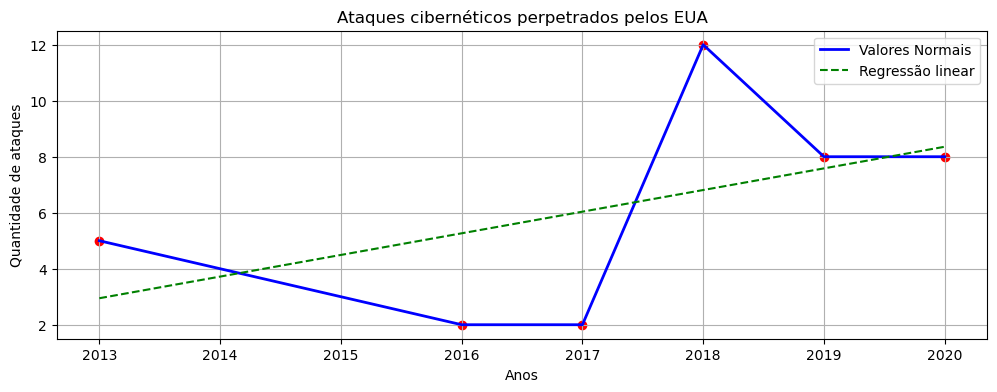

In [7]:
import matplotlib.pyplot as plt
import csv
import numpy as np

tudo = []
eixox = []
eixoy = []
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    next(leitor)
    for linhas in leitor:
        if len(linhas) == 0:
            pass
        else:
            tudo.append(linhas[1])
eixox = list(set(tudo))
eixox.sort()
for elemento in eixox:
    j = 0
    for item in tudo:
        if elemento == item:
            j +=1
    eixoy.append(j)
# Convertendo anos para valores numéricos em numpy
eixox = np.array([int(ano) for ano in eixox]).reshape(-1, 1)
eixoy = np.array(eixoy)
plt.figure(figsize=(12,4))
plt.plot(eixox,eixoy,'b',lw=2,label='Valores Normais')
plt.scatter(eixox,eixoy,color='r')

# Calculando a regressão linear
reg = np.c_[np.ones((len(eixox), 1)), eixox]
coeficiente = np.linalg.inv(reg.T.dot(reg)).dot(reg.T).dot(eixoy)

# Imprimindo os coeficientes
intercept, slope = coeficiente[0], coeficiente[1]

# Gerando pontos para a linha de regressão
regx_a = np.array([min(eixox), max(eixox)])
regx_b = np.c_[np.ones(2), regx_a]
regy = regx_b.dot(coeficiente)

plt.plot(regx_a,regy,color='green',label='Regressão linear',linestyle='--')

plt.title("Ataques cibernéticos perpetrados pelos EUA")
plt.xlabel("Anos")
plt.ylabel("Quantidade de ataques")
plt.grid()
plt.legend()
# Salvar o gráfico na pasta "plots"
plt.savefig('2_01_AtaquesCiberRealizadosEUA.png')

plt.show()

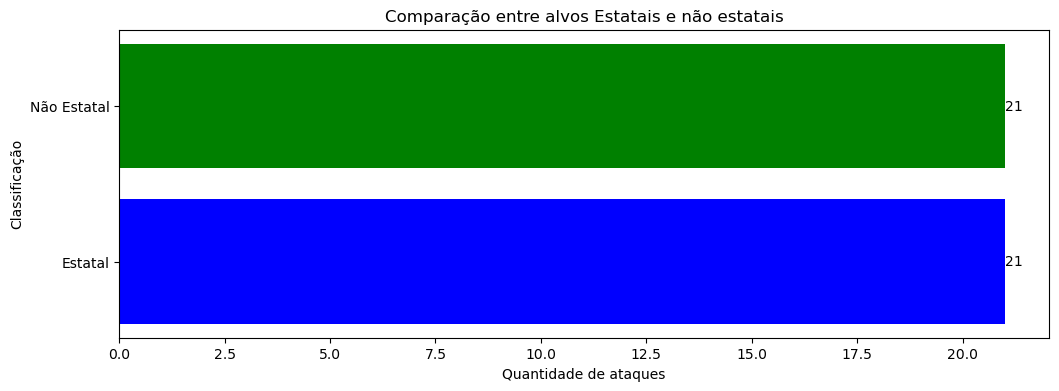

In [18]:
import matplotlib.pyplot as plt
import csv

# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    contagem_estatal = 0
    contagem_naoEstatal = 0
    
    # Contando o número de ataques em alvos estatais e não estatais
    for linhas in leitor:
        estatal_atacado = eval(linhas[8])
        contagem_estatal += len(estatal_atacado)
        
        naoEstatal_atacado = eval(linhas[9])
        contagem_naoEstatal += len(naoEstatal_atacado)

# Definindo os dados para o gráfico
eixoy = ['Estatal','Não Estatal']
eixox = [contagem_estatal, contagem_naoEstatal]

# Criando a figura com o tamanho desejado
plt.figure(figsize=(12, 4))

# Criando o gráfico de barras horizontal
bars = plt.barh(eixoy, eixox, color=['blue', 'green'])

# Adicionando os valores das contagens nas barras
for bar, count in zip(bars, eixox):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), va='center', ha='left', color='black')

# Adicionando título e rótulos aos eixos
plt.title("Comparação entre alvos Estatais e não estatais")
plt.xlabel("Quantidade de ataques")
plt.ylabel("Classificação")

#Salvando o arquivo
plt.savefig('2_02_EstxNEstRecebidosEUA.png')

# Exibindo o gráfico
plt.show()


['Agency', 'Chancellor', 'GRU', 'GRU', 'Islamic Revolutionary Guardrooms', 'NSA', 'Securities and Exchange Commission', 'defense', 'government', 'government_agencies', 'government_agencies', 'grid systems', 'intelligence', 'intelligence', 'intelligence', 'intelligence', 'intelligence', 'law enforcement agencies', 'military', 'military', 'military']


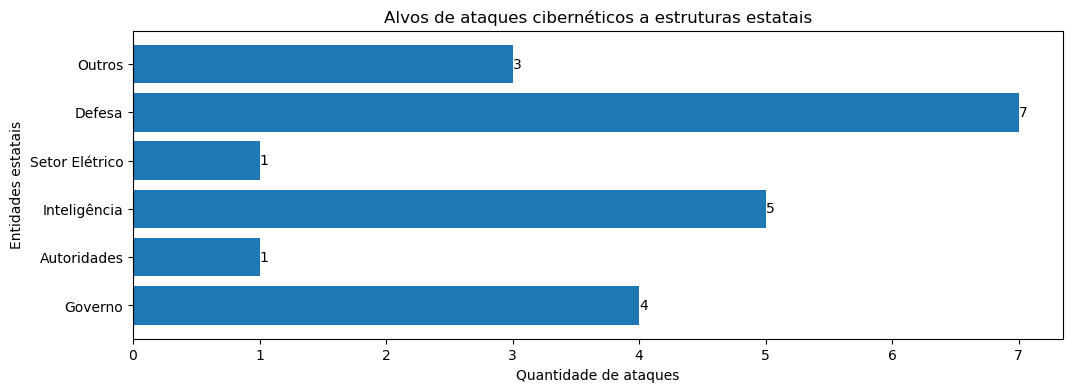

In [21]:
import matplotlib.pyplot as plt
import csv
array = []

# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[8]) == 2:
            continue
        else:
            for palavras in eval(linhas[8]):
                array.append(palavras)
array.sort()

#EIXOX
governo = ['Agency','government', 'government_agencies',]
autoridades = ['Chancellor',]
inteligencia = ['intelligence',]
setorEletrico = ['grid systems',]
defesa = ['GRU','Islamic Revolutionary Guardrooms','defense','military',]
outros = ['NSA', 'Securities and Exchange Commission','law enforcement agencies',]
eixox = ['Governo','Autoridades','Inteligência','Setor Elétrico','Defesa','Outros']

#EIXOY
contGoverno = contAut = contIntlg = contSeEl = contDef = contOutros = 0

contGoverno = sum(1 for itens in governo for palavras in array if itens == palavras)
contAut = sum(1 for itens in autoridades for palavras in array if itens == palavras)
contIntlg = sum(1 for itens in inteligencia for palavras in array if itens == palavras)
contSeEl = sum(1 for itens in setorEletrico for palavras in array if itens == palavras)
contDef = sum(1 for itens in defesa for palavras in array if itens == palavras)
contOutros = sum(1 for itens in outros for palavras in array if itens == palavras)

eixoy = [contGoverno, contAut, contIntlg, contSeEl, contDef, contOutros]

plt.figure(figsize=(12, 4))
bars = plt.barh(eixox,eixoy)
# Adicionando os valores das contagens nas barras
for bar, count in zip(bars, eixoy):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), va='center', ha='left', color='black')
plt.title("Alvos de ataques cibernéticos a estruturas estatais")
plt.xlabel("Quantidade de ataques")
plt.ylabel("Entidades estatais")

#Salvando o arquivo
plt.savefig('2_03_AtqRealizadosEUAEstatais.png')

# Exibindo o gráfico
plt.show()

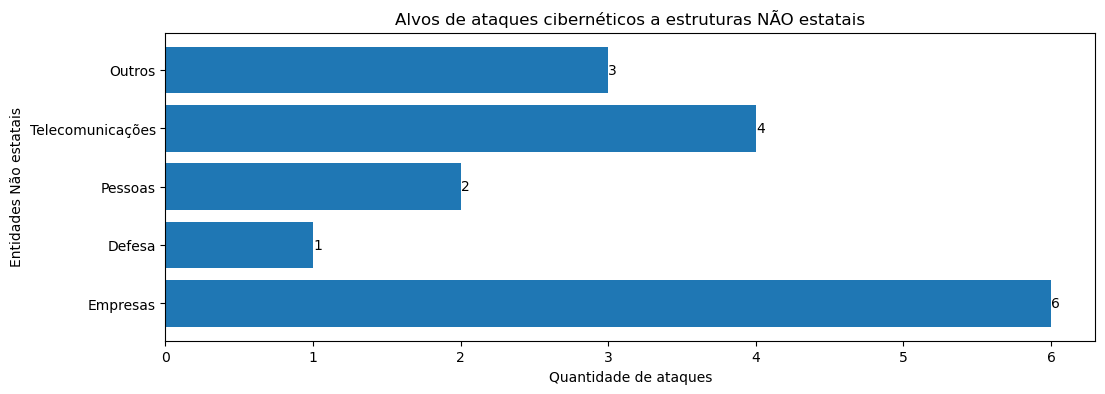

In [26]:
import matplotlib.pyplot as plt
import csv
array = []

# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[9]) == 2:
            continue
        else:
            for palavras in eval(linhas[9]):
                array.append(palavras)
array.sort()

#EIXOX
empresas = ['companies','industry','media',]
defesa = ['contractors',]
pessoas = ['hacker',]
telecom = ['telecommunications company', 'telecommunications company',]
outros = ['research organizations', 'scientific research','universities',]

eixox = ['Empresas','Defesa','Pessoas','Telecomunicações','Outros']

#EIXOY
contEmpresas = contDefesa = contPessoas = contTelecom = contOutros = 0

contEmpresas = sum(1 for itens in empresas for palavras in array if itens == palavras)
contDefesa = sum(1 for itens in defesa for palavras in array if itens == palavras)
contPessoas = sum(1 for itens in pessoas for palavras in array if itens == palavras)
contTelecom = sum(1 for itens in telecom for palavras in array if itens == palavras)
contOutros = sum(1 for itens in outros for palavras in array if itens == palavras)

eixoy = [contEmpresas, contDefesa, contPessoas, contTelecom, contOutros]

#Confeccionando o gráfico
plt.figure(figsize=(12, 4))
bars = plt.barh(eixox,eixoy)
# Adicionando os valores das contagens nas barras
for bar, count in zip(bars, eixoy):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), va='center', ha='left', color='black')
#Formatação
plt.title("Alvos de ataques cibernéticos a estruturas NÃO estatais")
plt.xlabel("Quantidade de ataques")
plt.ylabel("Entidades Não estatais")
#Salvando o arquivo
plt.savefig('2_04_AtqRealizadosEUANaoEstatais.png')

# Exibindo o gráfico
plt.show()

['CIA', 'Department of Justice', 'FBI', 'Justice Department', 'NSA', 'Treasury Department', 'United States Cyber Command', 'government', 'grand jury']
[3, 9, 1, 3, 3, 2, 4, 2, 1]


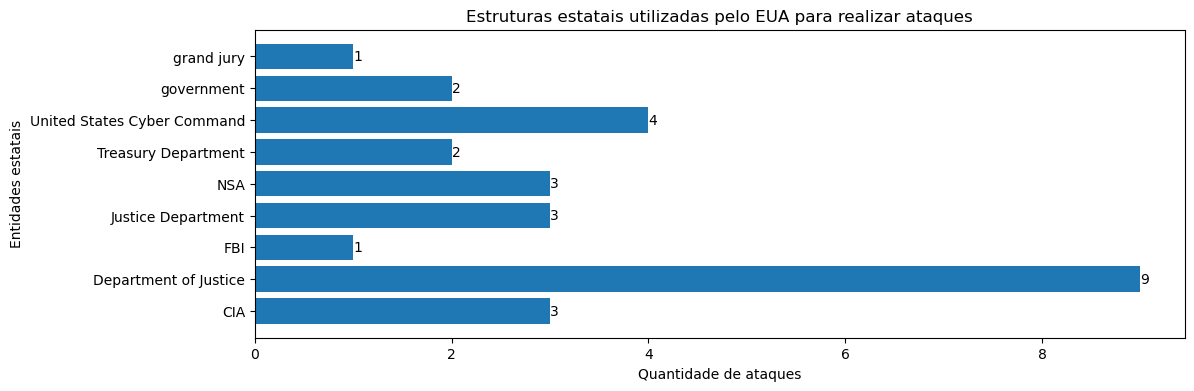

In [29]:
import matplotlib.pyplot as plt
import csv
array = []

# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[5]) == 2:
            continue
        else:
            for palavras in eval(linhas[5]):
                array.append(palavras)
array.sort()

#EIXOX
eixox = list(set(array))
eixox.sort()
print(eixox)

#EIXOY
eixoy = []
for itens in eixox:
    contador = 0
    for elementos in array:
        if itens == elementos:
            contador +=1
    eixoy.append(contador)
print(eixoy)
            

#Confeccionando o gráfico
plt.figure(figsize=(12, 4))
bars = plt.barh(eixox,eixoy)
# Adicionando os valores das contagens nas barras
for bar, count in zip(bars, eixoy):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), va='center', ha='left', color='black')
#Formatação
plt.title("Estruturas estatais utilizadas pelo EUA para realizar ataques")
plt.xlabel("Quantidade de ataques")
plt.ylabel("Entidades estatais")
#Salvando o arquivo
plt.savefig('2_04_AtqRealizadosEUANaoEstatais.png')

# Exibindo o gráfico
plt.show()

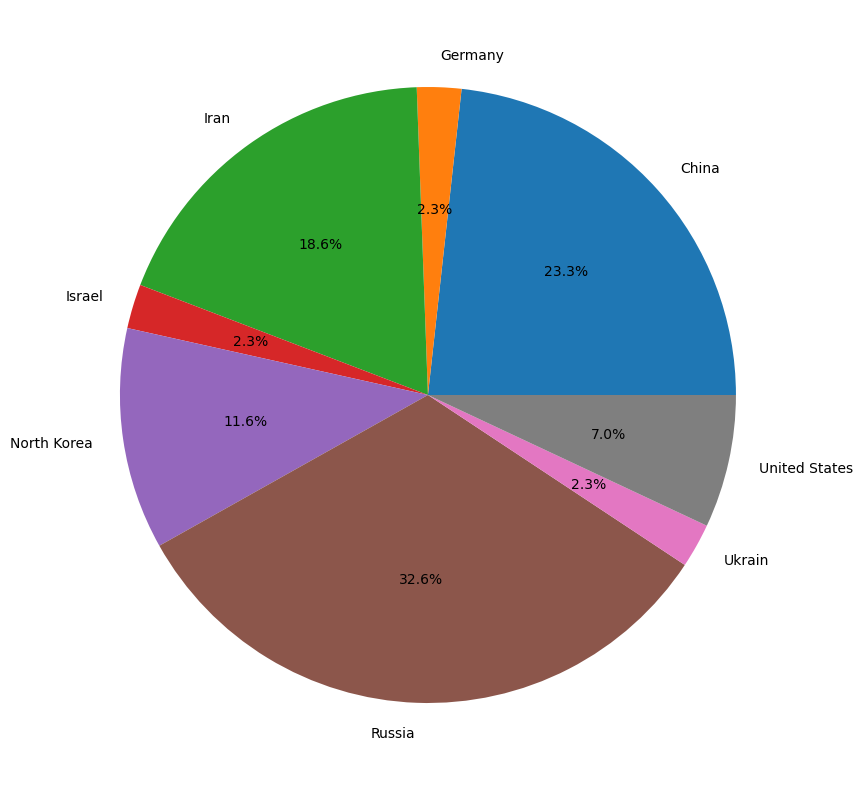

In [52]:
import matplotlib.pyplot as plt
import csv
array = []

# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[7]) == 2:
            continue
        else:
            for palavras in eval(linhas[7]):
                array.append(palavras)
array.sort()

#EIXOX
eixox = list(set(array))
eixox.sort()
titulo = eixox

#EIXOY
eixoy = []
for itens in eixox:
    contador = 0
    for elementos in array:
        if itens == elementos:
            contador += 1
    eixoy.append(contador)
dados = eixoy

pif, ax = plt.subplots(figsize=(10, 10))
#Mostrar as porcentagens de cada
ax.pie(dados, labels=titulo, autopct='%1.1f%%')
#Salvando o arquivo
plt.savefig('2_05_AtqRecebidosEUAPcpAtacantes.png')
plt.show()
            

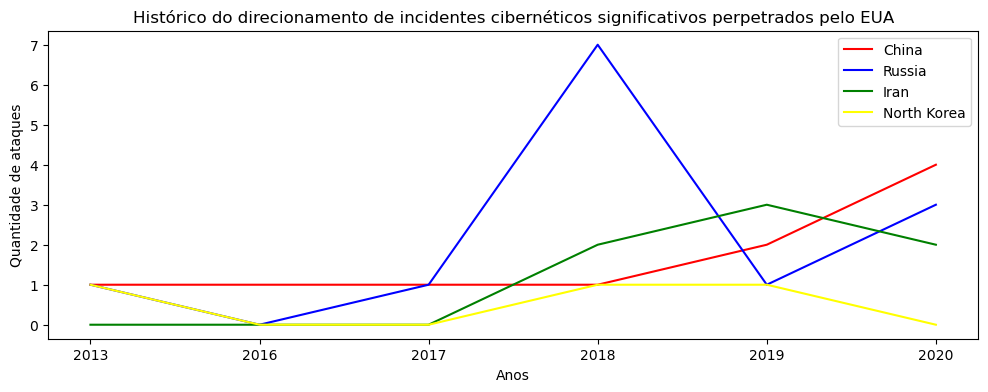

In [54]:
import matplotlib.pyplot as plt
import csv
array = []
anos = []
arrayChina = []
arrayRussia = []
arrayIran = []
arrayNK = []
# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[7]) == 2:
            continue
        else:
            anos.append(linhas[1])
            #lista = "\'"+linhas[1]+"\',\'"+linhas[7]+"\'"
            lista = linhas[1]+","+linhas[7]
            array.append(lista)
anos = list(set(anos))
anos.sort()
for ano in anos:
    contChina = contRussia = contIran = contNK = 0
    for itens in array:
        a = eval(itens)
        if int(ano) == int(a[0]):
            if 'China' in a[1]:
                contChina += 1
            elif 'Russia' in a[1]:
                contRussia += 1
            elif 'Iran' in a[1]:
                contIran += 1
            elif 'North Korea' in a[1]:
                contNK += 1
    arrayChina.append(contChina)
    arrayRussia.append(contRussia)
    arrayIran.append(contIran)
    arrayNK.append(contNK)
#Fazendo o gráfico
plt.figure(figsize=(12,4))
plt.plot(anos,arrayChina,label='China',color='red')
plt.plot(anos,arrayRussia,label='Russia',color='blue')
plt.plot(anos,arrayIran,label='Iran',color='green')
plt.plot(anos,arrayNK,label='North Korea',color = 'yellow')
plt.legend()
plt.title("Histórico do direcionamento de incidentes cibernéticos significativos perpetrados pelo EUA")
plt.xlabel("Anos")
plt.ylabel("Quantidade de ataques")
#Salvando o arquivo
plt.savefig('2_06_AtqRealizadosEUAEstadosXAnos.png')
plt.show()



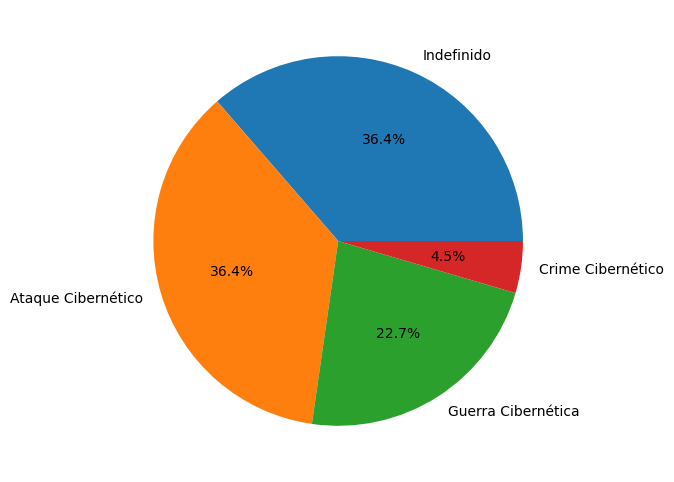

In [62]:
import matplotlib.pyplot as plt
import csv
array = []

# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if linhas[-1] == 'Não é uma ação cibernética':
            continue
        else:
            array.append(linhas[-1])
array.sort()
eixox = list(set(array))
eixoy = []
for item in eixox:
    contador = 0
    for elemento in array:
        if item == elemento:
            contador += 1
    eixoy.append(contador)
pif, ax = plt.subplots(figsize=(6, 6))
#Mostrar as porcentagens de cada
ax.pie(eixoy, labels=eixox, autopct='%1.1f%%')
#Salvando o arquivo
plt.savefig('2_07_AtqPerpetradosEUAPcpAcoesCiber.png')
plt.show()         

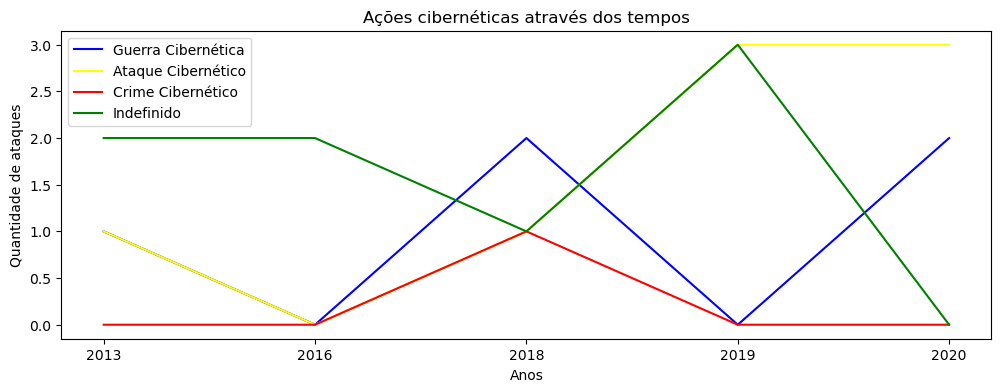

In [76]:
import matplotlib.pyplot as plt
import csv
array = []
anos = []
arrayGC = []
arrayAC = []
arrayCC =[]
arrayInd = []

# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if linhas[-1] == 'Não é uma ação cibernética':
            continue
        else:
            anos.append(linhas[1])
            lista = "\'"+linhas[1]+"\',\'"+linhas[-1]+"\'"
            array.append(lista)
anos = list(set(anos))
anos.sort()
for ano in anos:
    contGC = contAC = contCC = contI = 0
    for itens in array:
        a = eval(itens)
        if int(ano) == int(a[0]):
            if 'Guerra Cibernética' in a[1]:
                contGC += 1
            elif 'Ataque Cibernético' in a[1]:
                contAC += 1
            elif 'Crime Cibernético' in a[1]:
                contCC += 1
            elif 'Indefinido' in a[1]:
                contI += 1
    arrayGC.append(contGC)
    arrayAC.append(contAC)
    arrayCC.append(contCC)
    arrayInd.append(contI)
#Fazendo o gráfico
plt.figure(figsize=(12,4))
plt.plot(anos,arrayGC,label='Guerra Cibernética',color='blue')
plt.plot(anos,arrayAC, label='Ataque Cibernético',color='yellow')
plt.plot(anos,arrayCC, label='Crime Cibernético',color='red')
plt.plot(anos,arrayInd,label='Indefinido',color='green')
plt.legend()
plt.title("Ações cibernéticas através dos tempos")
plt.xlabel("Anos")
plt.ylabel("Quantidade de ataques")
plt.savefig('2_08_AtqPerpetradosEUAAcoesCiberXAno.png')
plt.show()

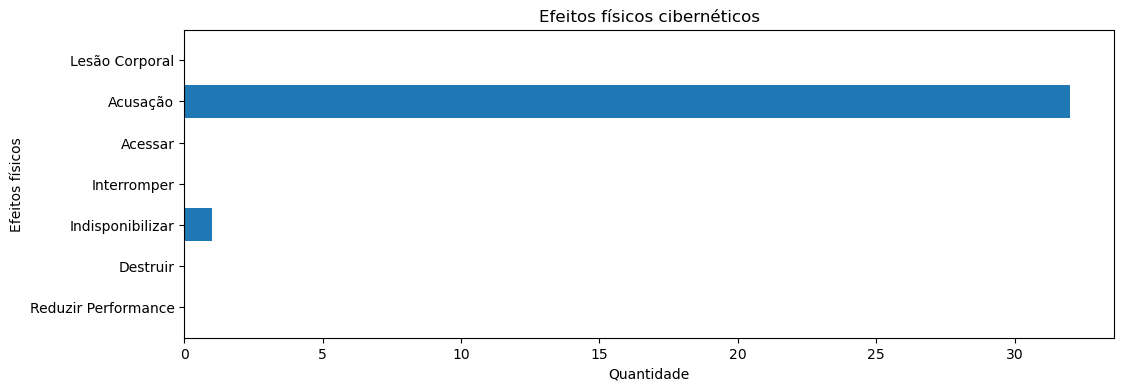

In [78]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-2])==2:
            continue
        else:
            lista = eval(linhas[-2])
            for elemento in lista:
                array.append(elemento)
array.sort()

#EIXO X
#EFEITO FÍSICO
#Degradar ou Reduzir a performance
redPerf =['reduced physical performance', 'phisicly performance',]
#Destruir
dest = ['destroyed', 'burned',]
#indisponibilizar
ind =['take down',]
#interromper
interromper= ['internet traffic','DoS','DDoS',]
#Acessar
acessar=['flash memory','USB',]
#Acusação
acusacao=['indicted','indictment','charged','ascribed',]
#Lesão corporal
lesCorp = ['die', 'bodly injure',]

titulo = ['Reduzir Performance','Destruir','Indisponibilizar','Interromper','Acessar','Acusação','Lesão Corporal']

#EIXO Y
contRedPerf = contDest = contInd = contInterromper = contAcessar = contAcusacao = contLesCorp = 0

contRedPerf = sum(1 for itens in redPerf for palavras in array if itens == palavras)
contDest = sum(1 for itens in dest for palavras in array if itens == palavras)
contInd = sum(1 for itens in ind for palavras in array if itens == palavras)
contInterromper = sum(1 for itens in interromper for palavras in array if itens == palavras)
contAcessar = sum(1 for itens in acessar for palavras in array if itens == palavras)
contAcusacao = sum(1 for itens in acusacao for palavras in array if itens == palavras)
contLesCorp = sum(1 for itens in lesCorp for palavras in array if itens == palavras)

dados=[contRedPerf, contDest, contInd, contInterromper, contAcessar, contAcusacao, contLesCorp]

#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(titulo,dados)
plt.title("Efeitos físicos cibernéticos")
plt.xlabel("Quantidade")
plt.ylabel("Efeitos físicos")

#Salvando
plt.savefig('2_09_AtqPerpetradosEUAEfeitoFisico.png')
plt.show()

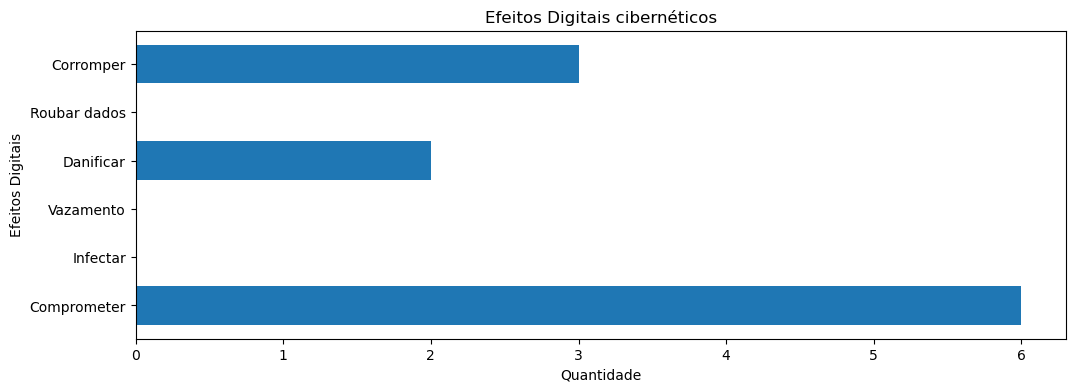

In [91]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-2])==2:
            continue
        else:
            lista = eval(linhas[-2])
            for elemento in lista:
                array.append(elemento)
array.sort()

#EIXO X
#DIGITAL
#Comprometer (acesso não autorizado)
comp=['breach','breached', 'compromising',  'disruption','compromise','gain access','gain unauthorized access','disrupt',
      'gained access','penetrated','interfered','try to steal', 'attempt to steal', 'monitor','penetrate', 'intrusion',]
#Infectar
inf=['exploiting', 'backdoor', 'malware', 'SQL', 'injection','SQL injection',]
#vazamento
vaz=['publish','data breach', 'exposing', 'release', 'publish',]
#Danificar / Indisponibilizar
danif=['botnet', 'DDoS','DoS', 'flood of traffic', 'network disrupted', 'disrupted their operations', 
       'growing volume of cyber activity', 'lock', 'shut down',]
#roubar dados
rob =['exfiltrate data','personal information','accessed data',
      'collect', 'eavesdrop','steal personal and financial data','exfiltrate','were taken', 
      'obtained','download','gather',]
#Corromper
corrom=['ransomware', 'crippled', 'rebuilt', 'loss registry', 'skew',]

titulo=['Comprometer','Infectar','Vazamento','Danificar','Roubar dados','Corromper']

#EIXOY
contComp = contInf = contVaz = contDanif = contRob = contCorrom = 0

contComp = sum(1 for itens in comp for palavras in array if itens == palavras)
contInf = sum(1 for itens in inf for palavras in array if itens == palavras)
contVaz = sum(1 for itens in vaz for palavras in array if itens == palavras)
contDanif = sum(1 for itens in danif for palavras in array if itens == palavras)
contRob = sum(1 for itens in rob for palavras in array if itens == palavras)
contCorrom = sum(1 for itens in corrom for palavras in array if itens == palavras)

dados=[contComp,contInf,contVaz,contDanif,contRob,contCorrom]


#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(titulo,dados)
plt.title("Efeitos Digitais cibernéticos")
plt.xlabel("Quantidade")
plt.ylabel("Efeitos Digitais")

#Salvando
plt.savefig('2_10_AtqPerpetradosEUAEfeitoDigital.png')
plt.show()

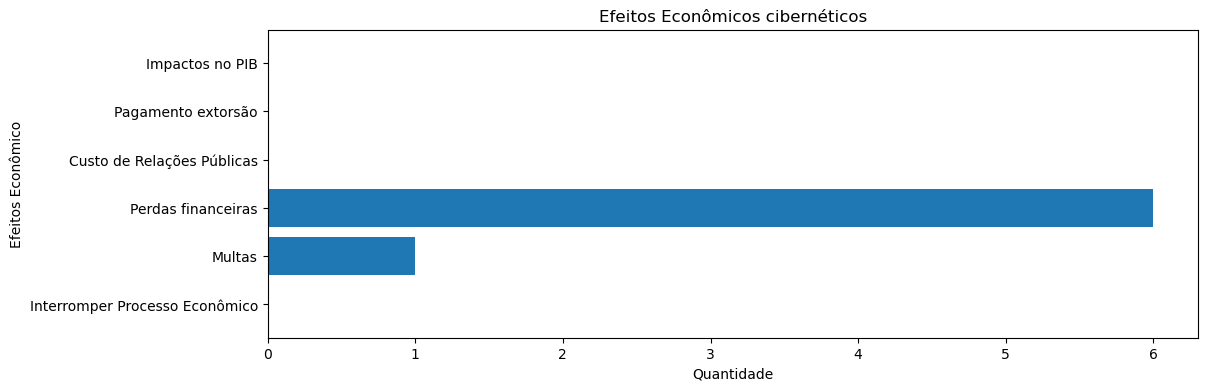

In [81]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-2])==2:
            continue
        else:
            lista = eval(linhas[-2])
            for elemento in lista:
                array.append(elemento)
array.sort()

#EIXO X
#ECONOMICO
#Interromper processo econômico
interromper=['Economic process interrupted',]
#Multas regulatórias
multas=['fines','sanctions', 'sconce', 'amerce', 'mulct',]
#perdas financeiras ou de capital
perdas=['stealing money', 'fraud','stolen money','dollars','intellectual property', 'commercial secrets', 'intellectual property',]
#Custo de resposta de RP
rp=['Public Relations', 'images costs',]
#Pagamento de extorsão
extor = ['payment', 'repayment']
#Impactos negativos sobre o PIB
gdp=['GDP',]

titulo=['Interromper Processo Econômico','Multas','Perdas financeiras','Custo de Relações Públicas','Pagamento extorsão','Impactos no PIB']

#EIXOY
contInt = contMultas = contPerdas = contRP = contExtor = contGdp = 0

contInt = sum(1 for itens in interromper for palavras in array if itens == palavras)
contMultas = sum(1 for itens in multas for palavras in array if itens == palavras)
contPerdas = sum(1 for itens in perdas for palavras in array if itens == palavras)
contRP = sum(1 for itens in rp for palavras in array if itens == palavras)
contExtor = sum(1 for itens in extor for palavras in array if itens == palavras)
contGdp = sum(1 for itens in gdp for palavras in array if itens == palavras)

dados=[contInt,contMultas,contPerdas,contRP,contExtor,contGdp]


#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(titulo,dados)
plt.title("Efeitos Econômicos cibernéticos")
plt.xlabel("Quantidade")
plt.ylabel("Efeitos Econômico")

#Salvando
plt.savefig('1_11_AtqPerpetradosEUAEfeitoEconomico.png')
plt.show()

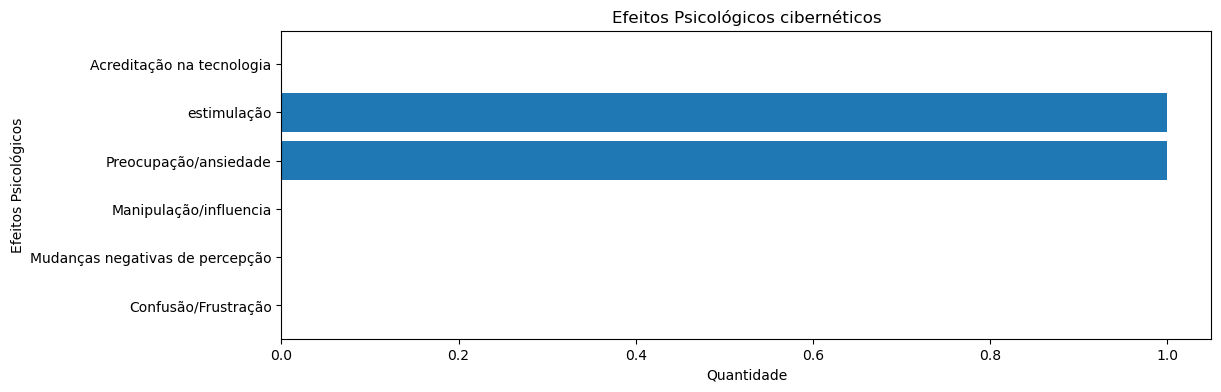

In [92]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-2])==2:
            continue
        else:
            lista = eval(linhas[-2])
            for elemento in lista:
                array.append(elemento)
array.sort()

#EIXO X
#Psicológicos
#Confusão/Frustração
conf=['fake news', 'false information', 'disinformation', 'skew',] 
#Mudanças negativas de percepção
perc=['perception change', 'sense modify',]
#Manipulação/influência
infl=['Trump campaign', 'Hilary campaign', 'political campaign', 'Democrats', 'Republicans',]
#Preocupação/ ansiedade
ans=['intimidation', 'alert', 'warning',]
#estimulação
det=['deterrent','stimulation','dissuasion',]
#Acreditação na tecnologia
tec=['tecnology believe', 'tecnology accreditation','science accreditation',]

titulo=['Confusão/Frustração','Mudanças negativas de percepção','Manipulação/influencia','Preocupação/ansiedade',
       'estimulação','Acreditação na tecnologia']

#EIXOY
contConf = contPerc = contInfl = contAns = contDet = contTec = 0

contConf = sum(1 for itens in conf for palavras in array if itens == palavras)
contPerc = sum(1 for itens in perc for palavras in array if itens == palavras)
contInfl = sum(1 for itens in infl for palavras in array if itens == palavras)
contAns = sum(1 for itens in ans for palavras in array if itens == palavras)
contDet = sum(1 for itens in det for palavras in array if itens == palavras)
contTec =sum(1 for itens in tec for palavras in array if itens == palavras)

dados=[contConf,contPerc,contInfl, contAns,contDet,contTec]

#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(titulo,dados)
plt.title("Efeitos Psicológicos cibernéticos")
plt.xlabel("Quantidade")
plt.ylabel("Efeitos Psicológicos")

#Salvando
plt.savefig('1_14_AtqPerpetradosEUAEfeitoPsc.png')
plt.show()

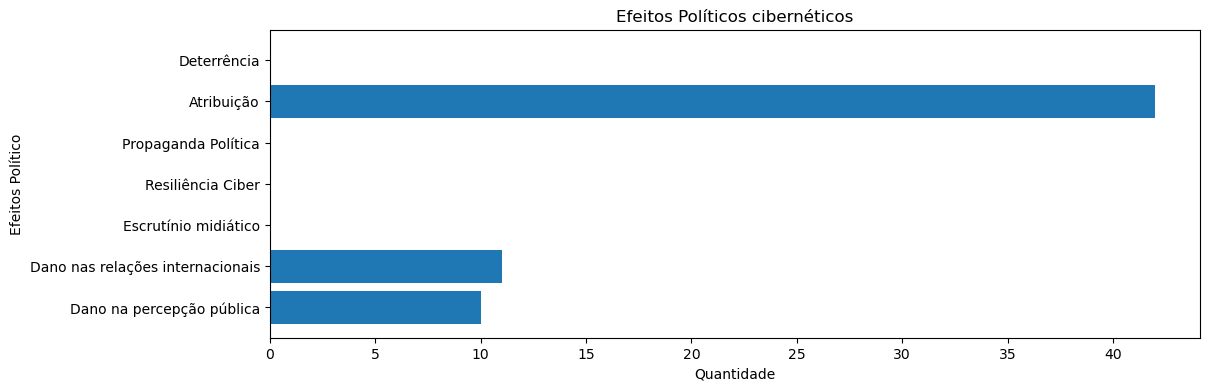

In [94]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-2])==2:
            continue
        else:
            lista = eval(linhas[-2])
            for elemento in lista:
                array.append(elemento)
array.sort()

#EIXO X
#POLÍTICO / REPUTACIONAL
#dano na percepção pública
percPub=['government','municipality', 'municipalities', 'agency','agencies', 'ministery',] 
#dano nas relações internacionais
dano=['blame','accuse','false information about']
#Escrutínio midiático
escr=['Wikileaks', 'media attention','New York Times','Washington Post',]
#Redução do status da resiliência ciber
resCiber=['cyber resilience',]
#Propaganda política
propPol=['intimidation campaign', ]
#atribuição
atr=['indicted','indictment','charged','ascribed','accuse',]
#Deterrência
det=['deterrence','dissuasion',]

titulo=['Dano na percepção pública','Dano nas relações internacionais','Escrutínio midiático','Resiliência Ciber',
       'Propaganda Política','Atribuição','Deterrência']

#EIXOY
contPerc = contDano = contEscr = contResCiber = contPropPol = contAtr = contDet = 0

contPerc = sum(1 for itens in percPub for palavras in array if itens == palavras)
contDano = sum(1 for itens in dano for palavras in array if itens == palavras)
contEscr = sum(1 for itens in escr for palavras in array if itens == palavras)
contResCiber = sum(1 for itens in resCiber for palavras in array if itens == palavras)
contPropPol = sum(1 for itens in propPol for palavras in array if itens == palavras)
contAtr = sum(1 for itens in atr for palavras in array if itens == palavras)
contDet = sum(1 for itens in det for palavras in array if itens == palavras)

dados=[contPerc, contDano, contEscr, contResCiber, contPropPol, contAtr, contDet]

#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(titulo,dados)
plt.title("Efeitos Políticos cibernéticos")
plt.xlabel("Quantidade")
plt.ylabel("Efeitos Político")

#Salvando
plt.savefig('1_15_AtqPerpetradosEUAEfeitoPolitico.png')
plt.show()

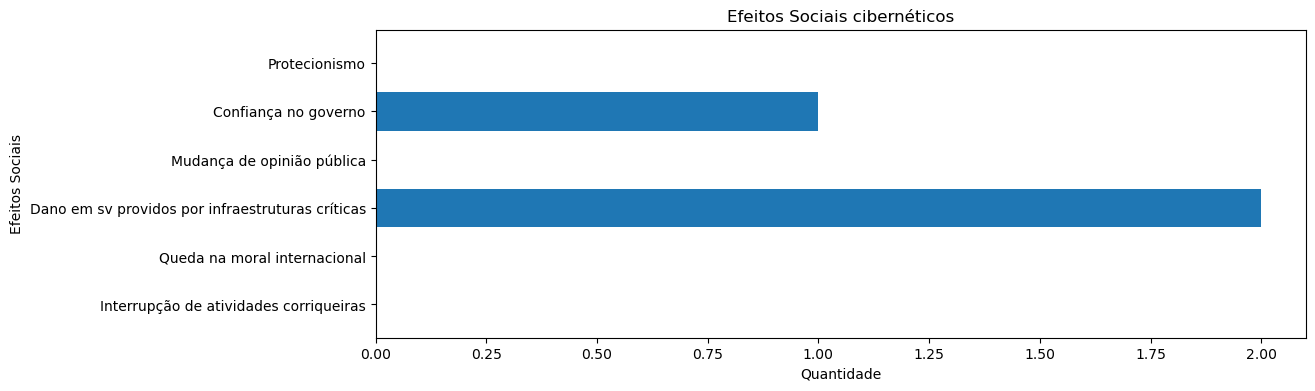

In [98]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacante.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-2])==2:
            continue
        else:
            lista = eval(linhas[-2])
            for elemento in lista:
                array.append(elemento)
array.sort()

#EIXO X
#SOCIAL/SOCIETAL
#Interrupção de atividades corriqueiras
atvC =['medical', 'utility companies','Uber',]
#Queda na moral internacional
moral=['false information',]
#Dano em serviços providos por infraestruturas críticas
danoIC=['critical infrastructure','restricted Internet access','infrastructure companies','electric utility companies',
                'electric utilities','energy companies','electric companies','energy','nuclear','energy facilities',
                'energy company','electrical utilities','electrical utility','power plants',]
#Mudança de opinião pública
opiniao=['information operations','public opinion', 'uprising', 'rebellion', 'insurgency',]
#Confiança no governo
conf=['bilateral agreement','trust in government',]
#Protecionismo
prot=['social proteccionism']

titulo=['Interrupção de atividades corriqueiras','Queda na moral internacional',
        'Dano em sv providos por infraestruturas críticas','Mudança de opinião pública','Confiança no governo',
       'Protecionismo']

#EIXOY
contAtvC = contMoral = contDanoIC = contOpiniao = contConf = contProt = 0

contAtvC = sum(1 for itens in atvC for palavras in array if itens == palavras)
contMoral = sum(1 for itens in moral for palavras in array if itens == palavras)
contDanoIC = sum(1 for itens in danoIC for palavras in array if itens == palavras)
contOpiniao = sum(1 for itens in opiniao for palavras in array if itens == palavras)
contConf = sum(1 for itens in conf for palavras in array if itens == palavras)
contProt = sum(1 for itens in prot for palavras in array if itens == palavras)

dados=[contAtvC, contMoral, contDanoIC, contOpiniao, contConf, contProt]

#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(titulo,dados)
plt.title("Efeitos Sociais cibernéticos")
plt.xlabel("Quantidade")
plt.ylabel("Efeitos Sociais")

#Salvando
plt.savefig('1_16_AtqPerpetradosEUAEfeitoSocial.png')
plt.show()